In [1]:
# Step 1: Install Required Libraries
# Installing pytorch-tabnet, pandas, scikit-learn and matplotlib for training and evaluation.
!pip install pytorch-tabnet scikit-learn pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import LabelEncoder
from pytorch_tabnet.tab_model import TabNetClassifier

In [3]:
# Step 3: Upload and Read Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Modified_SQL_Dataset.csv')

Saving Modified_SQL_Dataset.csv to Modified_SQL_Dataset.csv


In [4]:
# Step 4: Prepare Data for TabNet
X_raw = df['Query'].astype(str)
y_raw = df['Label']

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X_raw).toarray()

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_raw)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Step 5: Train TabNet Classifier with Early Stopping to Prevent Overfitting
tabnet_model = TabNetClassifier(
    n_d=64, n_a=64, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    verbose=1
)

tabnet_model.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_test, y_test)],
    eval_name=['test'],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=20,
    batch_size=1024, virtual_batch_size=128
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.87572 | test_accuracy: 0.62953 |  0:00:55s
epoch 1  | loss: 0.66424 | test_accuracy: 0.62953 |  0:01:42s
epoch 2  | loss: 0.66388 | test_accuracy: 0.63147 |  0:02:28s
epoch 3  | loss: 0.58485 | test_accuracy: 0.62759 |  0:03:13s
epoch 4  | loss: 0.54913 | test_accuracy: 0.64182 |  0:03:59s
epoch 5  | loss: 0.33798 | test_accuracy: 0.63098 |  0:04:42s
epoch 6  | loss: 0.14461 | test_accuracy: 0.64408 |  0:05:24s
epoch 7  | loss: 0.08257 | test_accuracy: 0.76569 |  0:06:12s
epoch 8  | loss: 0.05499 | test_accuracy: 0.78218 |  0:06:52s
epoch 9  | loss: 0.04323 | test_accuracy: 0.8032  |  0:07:34s
epoch 10 | loss: 0.03955 | test_accuracy: 0.81662 |  0:08:16s
epoch 11 | loss: 0.04239 | test_accuracy: 0.87177 |  0:08:58s
epoch 12 | loss: 0.03963 | test_accuracy: 0.86594 |  0:09:40s
epoch 13 | loss: 0.03838 | test_accuracy: 0.86303 |  0:10:26s
epoch 14 | loss: 0.03612 | test_accuracy: 0.87047 |  0:11:21s
epoch 15 | loss: 0.0334  | test_accuracy: 0.9219  |  0:12:12s
epoch 16

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [6]:
# Step 6: Predict and Evaluate TabNet Model
y_pred = tabnet_model.predict(X_test)
y_pred_proba = tabnet_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.9947
Precision: 0.9996
Recall: 0.9860
F1 Score: 0.9927
ROC AUC Score: 0.9970


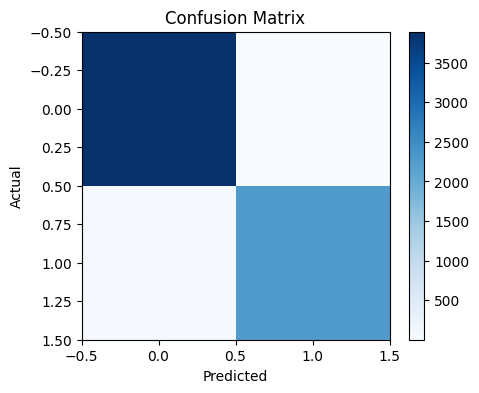

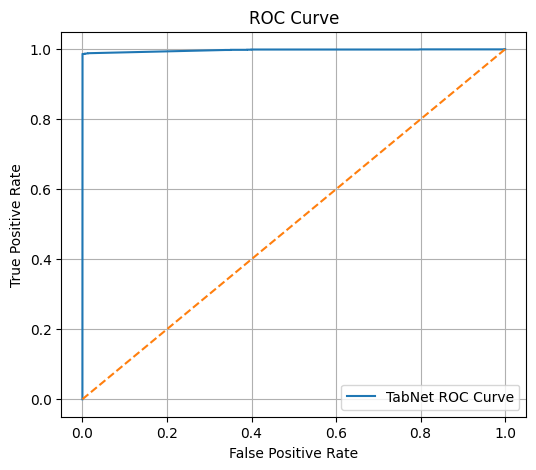

In [7]:
# Step 7: Visualize Confusion Matrix and ROC Curve
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='TabNet ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Step 8: Create a Simple Interface using Gradio
import gradio as gr

def detect_sql_gradio(query):
    input_vector = vectorizer.transform([query]).toarray()
    prediction = tabnet_model.predict(input_vector)
    return "⚠️ SQL Injection Detected" if prediction[0] == 1 else "✅ Normal Input"

interface = gr.Interface(
    fn=detect_sql_gradio,
    inputs=gr.Textbox(lines=2, placeholder='Enter SQL query or username...'),
    outputs="text",
    title="SQL Injection Detection with TabNet",
    description="Enter any SQL query or username input. This model detects whether it is a potential SQL injection attempt."
)

interface.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://deec64bf2ecc68600a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://deec64bf2ecc68600a.gradio.live


In [8]:
# 📌 Note for Research Report:
# This notebook evaluates the TabNet model for detecting SQL injection.
# Logistic Regression or other models were excluded to focus the research solely on TabNet performance and enhancements.
# Early stopping and a learning rate scheduler are used to minimize overfitting.
# Adjustments like n_d, n_a, and mask_type were tested for best results.
